<a href="https://colab.research.google.com/github/Anik-Adnan/Fundamentals-of-Deep-Learning-of-Neural-Networks/blob/main/Feed_Propagation_of_Neuron_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

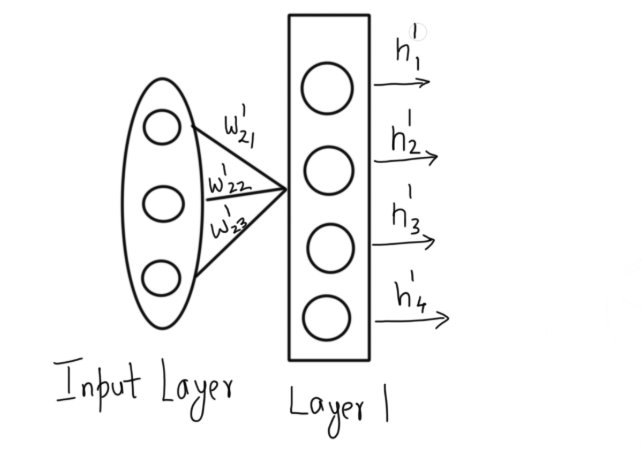

# <font size="6">Flow of Information in Neural Networks – Between Two Layers</font>

In a feedforward neural network, the output of one layer is used as input to the next layer. There are no loops; information always flows forward.

---

### <font size="5">Step-by-Step Feedforward Calculation</font>

**Given:**

* **Input vector ($x_i$)** of size ($3, 1$):
    $$x_i = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix}$$
* **First hidden layer ($h^1$)** with 4 neurons:
    $$h^1 = \begin{bmatrix} h^1_1 \\ h^1_2 \\ h^1_3 \\ h^1_4 \end{bmatrix}$$
* **Weight matrix ($W^1$)** of size $4 \times 3$:
    $$W^1 = \begin{bmatrix} w^1_{11} & w^1_{12} & w^1_{13} \\ w^1_{21} & w^1_{22} & w^1_{23} \\ w^1_{31} & w^1_{32} & w^1_{33} \\ w^1_{41} & w^1_{42} & w^1_{43} \end{bmatrix}$$
    *(Note: $w^l_{ij}$ represents the weight connecting neuron $j$ of the previous layer to neuron $i$ of layer $l$.)*
* **Bias vector ($b^1$)** of size ($4, 1$):
    $$b^1 = \begin{bmatrix} b^1_1 \\ b^1_2 \\ b^1_3 \\ b^1_4 \end{bmatrix}$$



---

### <font size="5">Forward Propagation Steps</font>

**1. Compute the weighted sum of inputs:**
$$W^1 \cdot x_i = \begin{bmatrix} w^1_{11}x_1 + w^1_{12}x_2 + w^1_{13}x_3 \\ w^1_{21}x_1 + w^1_{22}x_2 + w^1_{23}x_3 \\ w^1_{31}x_1 + w^1_{32}x_2 + w^1_{33}x_3 \\ w^1_{41}x_1 + w^1_{42}x_2 + w^1_{43}x_3 \end{bmatrix}$$

**2. Add the bias vector:**
$$W^1 \cdot x_i + b^1 = \begin{bmatrix} w^1_{11}x_1 + w^1_{12}x_2 + w^1_{13}x_3 + b^1_1 \\ w^1_{21}x_1 + w^1_{22}x_2 + w^1_{23}x_3 + b^1_2 \\ w^1_{31}x_1 + w^1_{32}x_2 + w^1_{33}x_3 + b^1_3 \\ w^1_{41}x_1 + w^1_{42}x_2 + w^1_{43}x_3 + b^1_4 \end{bmatrix}$$

**3. Apply the activation function element-wise:**
$$h^1 = \sigma(W^1 \cdot x_i + b^1) = \begin{bmatrix} \sigma(w^1_{11}x_1 + w^1_{12}x_2 + w^1_{13}x_3 + b^1_1) \\ \sigma(w^1_{21}x_1 + w^1_{22}x_2 + w^1_{23}x_3 + b^1_2) \\ \sigma(w^1_{31}x_1 + w^1_{32}x_2 + w^1_{33}x_3 + b^1_3) \\ \sigma(w^1_{41}x_1 + w^1_{42}x_2 + w^1_{43}x_3 + b^1_4) \end{bmatrix}$$



---

### <font size="5">Summary for $i^{th}$ neuron in layer $l$:</font>
1.  **Weighted Sum**: Multiply the $i^{th}$ row of the weight matrix ($W^l$) with the output of the previous layer ($h^{l-1}$).
2.  **Cumulative Sum**: Add the $i^{th}$ bias term ($b^l_i$) from the bias vector.
3.  **Activation**: Apply the activation function $\sigma$ to the cumulative input.
$$h^l_i = \sigma\left(\sum_{j} w^l_{ij} h^{l-1}_j + b^l_i\right)$$

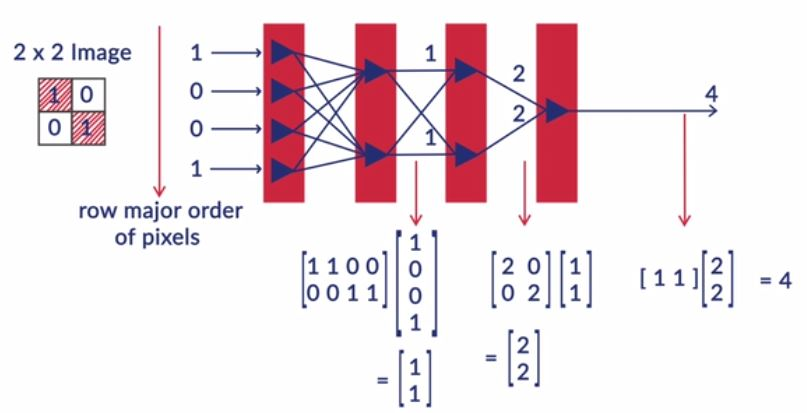

# <font size="6">Information Flow - Image Recognition Example</font>

To understand the feedforward process intuitively, we will analyze a simple neural network designed to count and amplify the number of "on" (grey) pixels in a $2 \times 2$ image.

### <font size="5">1. Input Representation</font>
A $2 \times 2$ image contains 4 pixels. In a feedforward network, these are flattened into a single input vector based on **row-major order**.


---

### <font size="5">2. Layer-by-Layer Forward Propagation</font>

For this specific example, we assume:
* **Biases** ($b$): All biases are $0$.
* **Activation Function**: A trivial **identity function** (passthrough) is used.

#### **Layer 1: Pixel Counting**
The first hidden layer counts the number of grey pixels in each row. The first neuron counts row 1, and the second neuron counts row 2.
* **Weight Matrix ($W^1$)**: Dimensions $2 \times 4$.
$$W^1 = \begin{bmatrix} 1 & 1 & 0 & 0 \\ 0 & 0 & 1 & 1 \end{bmatrix}$$

#### **Layer 2: Amplification**
The second hidden layer amplifies the counts from the previous layer by a factor of 2.
* **Weight Matrix ($W^2$)**: Dimensions $2 \times 2$.
$$W^2 = \begin{bmatrix} 2 & 0 \\ 0 & 2 \end{bmatrix}$$

#### **Layer 3: Output (Final Sum)**
The output layer adds the two amplified elements together to report the total amplified count of grey pixels.
* **Weight Matrix ($W^3$)**: Dimensions $1 \times 2$.
$$W^3 = \begin{bmatrix} 1 & 1 \end{bmatrix}$$

---

### <font size="5">3. Mathematical Visualization of the Flow</font>

The entire process can be visualized as a series of matrix multiplications:


1.  **Input $\to$ Layer 1**: $\begin{bmatrix} 1 & 1 & 0 & 0 \\ 0 & 0 & 1 & 1 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \\ 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$ (Counts: 1 in Row 1, 1 in Row 2)
2.  **Layer 1 $\to$ Layer 2**: $\begin{bmatrix} 2 & 0 \\ 0 & 2 \end{bmatrix} \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \begin{bmatrix} 2 \\ 2 \end{bmatrix}$ (Amplified counts)
3.  **Layer 2 $\to$ Output**: $\begin{bmatrix} 1 & 1 \end{bmatrix} \begin{bmatrix} 2 \\ 2 \end{bmatrix} = 4$ (Total amplified count)

---

### <font size="5">Key Takeaway</font>
While hidden layers in large, real-world networks are usually not this interpretable, this example demonstrates how matrix operations ($W \cdot x$) transform raw input into a specific, meaningful output.

# 📝 Calculation: Information Flow for Image Recognition (Clockwise Order)

### **Question**
Consider a $2 \times 2$ grayscale image where the pixels are represented as a vector in **clockwise order** (starting from top-left). For the image provided, the input vector is:
$$x = \begin{bmatrix} 1 \\ 0 \\ 1 \\ 0 \end{bmatrix}$$
Using the weight matrices provided in the figure, calculate the output of each layer, assuming all biases are $0$ and the activation function is $f(x) = x$.

---

### **✅ Final Output**
**4**

---

### **📝 Step-by-Step Calculation**

#### **1. Input Vector ($x$)**
The pixels are counted clockwise from the top-left:
* Top-left: **1**
* Top-right: **0**
* Bottom-right: **1**
* Bottom-left: **0**
$$x = \begin{bmatrix} 1 \\ 0 \\ 1 \\ 0 \end{bmatrix}$$

#### **2. Layer 1 Output ($h^1$)**
This layer counts 'on' pixels. The first neuron counts Row 1, and the second counts Row 2.
* **Weight Matrix ($W^1$):** $\begin{bmatrix} 1 & 1 & 0 & 0 \\ 0 & 0 & 1 & 1 \end{bmatrix}$
* **Calculation:**
$$h^1 = W^1 \cdot x = \begin{bmatrix} 1 & 1 & 0 & 0 \\ 0 & 0 & 1 & 1 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \\ 1 \\ 0 \end{bmatrix} = \begin{bmatrix} (1\times1 + 1\times0) \\ (1\times1 + 1\times0) \end{bmatrix} = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$$

#### **3. Layer 2 Output ($h^2$)**
This layer amplifies the counts by a factor of 2.
* **Weight Matrix ($W^2$):** $\begin{bmatrix} 2 & 0 \\ 0 & 2 \end{bmatrix}$
* **Calculation:**
$$h^2 = W^2 \cdot h^1 = \begin{bmatrix} 2 & 0 \\ 0 & 2 \end{bmatrix} \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \begin{bmatrix} 2 \\ 2 \end{bmatrix}$$

#### **4. Output Layer ($h^3$)**
The final layer sums the amplified counts.
* **Weight Matrix ($W^3$):** $\begin{bmatrix} 1 & 1 \end{bmatrix}$
* **Calculation:**
$$h^3 = W^3 \cdot h^2 = \begin{bmatrix} 1 & 1 \end{bmatrix} \begin{bmatrix} 2 \\ 2 \end{bmatrix} = (1\times2 + 1\times2) = \mathbf{4}$$

### **Summary of Result**
Even with the change to clockwise indexing, the total number of 'on' pixels (2) multiplied by the amplification factor (2) correctly yields a final output of **4**.

# 📝 Quiz 1: Identifying Inputs for a Specific Output

### **Question**
If the output of the network is **6**, which of the following are possible inputs? (The input vector follows clockwise order: top-left, top-right, bottom-right, bottom-left).

1. $\begin{bmatrix} 0 \\ 1 \\ 1 \\ 1 \end{bmatrix}$
2. $\begin{bmatrix} 1 \\ 0 \\ 1 \\ 1 \end{bmatrix}$
3. $\begin{bmatrix} 0 \\ 0 \\ 1 \\ 1 \end{bmatrix}$
4. $\begin{bmatrix} 1 \\ 1 \\ 0 \\ 1 \end{bmatrix}$

---

### **✅ Correct Answers**
* **$\begin{bmatrix} 0 \\ 1 \\ 1 \\ 1 \end{bmatrix}$**
* **$\begin{bmatrix} 1 \\ 0 \\ 1 \\ 1 \end{bmatrix}$**
* **$\begin{bmatrix} 1 \\ 1 \\ 0 \\ 1 \end{bmatrix}$**

---

### **📝 Detailed Explanation**

To solve this, we work backward from the output to find the required number of "on" pixels ($1$s) in the input vector.



**Step 1: Determine the number of pixels required**
* The network's goal is to provide an **amplified count** of "on" pixels.
* The amplification factor is **2** (determined by $W^2$).
* If the Output = $6$, then:
    $$\text{Number of "on" pixels} \times 2 = 6$$
    $$\text{Number of "on" pixels} = 3$$.

**Step 2: Evaluate the options**
We look for input vectors that contain exactly **three** pixels with a value of $1$:

* **Option 1**: $\begin{bmatrix} 0 & 1 & 1 & 1 \end{bmatrix}^T \rightarrow$ **3 pixels on**. Correct.
* **Option 2**: $\begin{bmatrix} 1 & 0 & 1 & 1 \end{bmatrix}^T \rightarrow$ **3 pixels on**. Correct.
* **Option 3**: $\begin{bmatrix} 0 & 0 & 1 & 1 \end{bmatrix}^T \rightarrow$ **2 pixels on**. (Output would be $2 \times 2 = 4$). Incorrect.
* **Option 4**: $\begin{bmatrix} 1 & 1 & 0 & 1 \end{bmatrix}^T \rightarrow$ **3 pixels on**. Correct.

**Final Result:**
Any input vector with exactly three "on" pixels will result in an output of 6.

# 📝 Quiz 2: Output of a Specific Neuron

### **Question**
For the input vector $x = \begin{bmatrix} 1 \\ 1 \\ 0 \\ 0 \end{bmatrix}$ (clockwise order), what is the output of the **first neuron** of hidden layer 1?

1. 0
2. 1
3. **2**
4. 3

---

### **✅ Correct Answer**
**2**

---

### **📝 Detailed Explanation**

To find the output of a single neuron within a layer, we multiply the corresponding row of the weight matrix by the input vector.

**1. Identify the Weight Row**
The first hidden layer counts the number of 'on' pixels in Row 1. The first row of the weight matrix $W^1$ is:
$$W^1_{row1} = \begin{bmatrix} 1 & 1 & 0 & 0 \end{bmatrix}$$



**2. Identify the Input Vector ($x$)**
The input provided is:
$$x = \begin{bmatrix} 1 \\ 1 \\ 0 \\ 0 \end{bmatrix}$$

**3. Perform the Calculation**
Since the bias is 0 and the activation function is $f(x) = x$, we simply calculate the weighted sum:
$$h^1_1 = (w^1_{11} \cdot x_1) + (w^1_{12} \cdot x_2) + (w^1_{13} \cdot x_3) + (w^1_{14} \cdot x_4)$$
$$h^1_1 = (1 \times 1) + (1 \times 1) + (0 \times 0) + (0 \times 0)$$
$$h^1_1 = 1 + 1 + 0 + 0 = \mathbf{2}$$

**Final Result:**
The output of the first neuron is **2**, representing that there are two 'on' pixels in the first row of the image.

# 📝 Quiz 3: Modifying Weight Matrices for Column-Wise Counting

### **Question**
You want to modify the weights of **Layer 1** so that the first and second neurons represent the number of ‘on’ pixels in the **first and second columns** of the input image, respectively.

**Constraints:**
* The input vector $x$ is created by counting pixels **clockwise** starting from the top-left.
* This must hold true for all possible inputs.

What should be the weight matrix $W^1$?

1. $\begin{bmatrix} 0 & 0 & 1 & 1 \\ 1 & 1 & 0 & 0 \end{bmatrix}$
2. **$\begin{bmatrix} 1 & 0 & 0 & 1 \\ 0 & 1 & 1 & 0 \end{bmatrix}$**
3. $\begin{bmatrix} 1 & 0 & 1 & 0 \\ 1 & 0 & 1 & 0 \end{bmatrix}$
4. $\begin{bmatrix} 0 & 1 & 0 & 1 \\ 0 & 1 & 0 & 1 \end{bmatrix}$

---

### **✅ Correct Answer**
**$\begin{bmatrix} 1 & 0 & 0 & 1 \\ 0 & 1 & 1 & 0 \end{bmatrix}$**

---

### **📝 Detailed Explanation**

To solve this, we must first map the clockwise input vector back to the physical columns of a $2 \times 2$ image.

**Step 1: Map the Clockwise Input Vector ($x$)**
When counting pixels clockwise starting from the top-left:
* $x_1$: Top-Left Pixel (**Column 1**)
* $x_2$: Top-Right Pixel (**Column 2**)
* $x_3$: Bottom-Right Pixel (**Column 2**)
* $x_4$: Bottom-Left Pixel (**Column 1**)



**Step 2: Define Neuron Objectives**
* **Neuron 1 (Row 1 of $W^1$)**: Must count Column 1 ($x_1$ and $x_4$). The weights for these inputs should be $1$, and others $0$.
    * Resulting Row: $\begin{bmatrix} 1 & 0 & 0 & 1 \end{bmatrix}$
* **Neuron 2 (Row 2 of $W^1$)**: Must count Column 2 ($x_2$ and $x_3$). The weights for these inputs should be $1$, and others $0$.
    * Resulting Row: $\begin{bmatrix} 0 & 1 & 1 & 0 \end{bmatrix}$

**Step 3: Form the Matrix**
Combining these rows gives us the weight matrix $W^1$:
$$W^1 = \begin{bmatrix} 1 & 0 & 0 & 1 \\ 0 & 1 & 1 & 0 \end{bmatrix}$$

**Final Result:**
This matrix ensures that the first neuron sums the left column and the second neuron sums the right column of the image.

# 📝 Quiz 4: Computational Complexity of Forward Propagation

### **Question**
Let's assume that each elementary algebraic operation, such as the multiplication of two numbers or applying the activation function on a scalar $f(x)$, takes **0.10 microseconds**. (Note: Addition is NOT included as an operation).

For the network discussed (counting and amplifying pixels), how much time would it take to compute the final output from the input?

**Given:**
* **$W^1$**: Size $2 \times 4$
* **$W^2$**: Size $2 \times 2$
* **$W^3$**: Size $1 \times 2$
* The activation function is applied to each of the three layers' outputs ($h^1, h^2, h^3$).

1. **1.9 microseconds**
2. 1.3 microseconds
3. 19 microseconds
4. 2.1 microseconds

---

### **✅ Correct Answer**
**1.9 microseconds**

---

### **📝 Detailed Explanation**

To find the total time, we must count the total number of operations (multiplications + activation applications) and multiply by the time per operation ($0.10 \mu s$).

#### **1. Layer 1 Calculations ($h^1 = \sigma(W^1 \cdot x)$)**
* **Multiplications**: A $2 \times 4$ matrix multiplied by a $4 \times 1$ vector requires $2 \times 4 = \mathbf{8}$ multiplications.
* **Activations**: The resulting vector has 2 elements, so $\sigma$ is applied **2** times.
* **Total Ops for Layer 1**: $8 + 2 = 10$ operations.

#### **2. Layer 2 Calculations ($h^2 = \sigma(W^2 \cdot h^1)$)**
* **Multiplications**: A $2 \times 2$ matrix multiplied by a $2 \times 1$ vector requires $2 \times 2 = \mathbf{4}$ multiplications.
* **Activations**: The resulting vector has 2 elements, so $\sigma$ is applied **2** times.
* **Total Ops for Layer 2**: $4 + 2 = 6$ operations.

#### **3. Layer 3 Calculations ($h^3 = \sigma(W^3 \cdot h^2)$)**
* **Multiplications**: A $1 \times 2$ matrix multiplied by a $2 \times 1$ vector requires $1 \times 2 = \mathbf{2}$ multiplications.
* **Activations**: The resulting vector has 1 element, so $\sigma$ is applied **1** time.
* **Total Ops for Layer 3**: $2 + 1 = 3$ operations.

---

### **Total Time Calculation**
* **Total Operations** = $10 + 6 + 3 = \mathbf{19}$ operations.
* **Total Time** = $19 \text{ operations} \times 0.10 \text{ microseconds/operation}$
* **Result** = **1.9 microseconds**.

# 📝 Calculation Breakdown: Layer 3 Activation Operations

### **Question**
Why is there only **1 activation operation** in Layer 3?

---

### **✅ Answer**
In a neural network, the activation function is applied to the **output of each neuron** in a layer. Since Layer 3 in this specific network is the **output layer** and contains only **one neuron**, the activation function is applied only once.

---

### **📝 Detailed Explanation**

To understand why we count only one activation, we look at the structure of the network's final stage:

* **Neuron Count**: Layer 3 (the output layer) consists of a single neuron designed to report the final "Amplified Count".
* **The Process**:
    1.  **Weighted Sum**: The weight matrix $W^3$ (size $1 \times 2$) multiplies the input vector from the previous layer ($h^2$, size $2 \times 1$).
    2.  **Resulting Scalar**: This multiplication results in a single number (a scalar).
    3.  **Activation**: The activation function $\sigma(x)$ is then applied to that **single** resulting value to produce the final output, $h^3$.



### **Comparison Across Layers**

| Layer | Number of Neurons | Activations Applied |
| :--- | :--- | :--- |
| **Layer 1** | 2 Neurons | 2 (One for each neuron) |
| **Layer 2** | 2 Neurons | 2 (One for each neuron) |
| **Layer 3** | **1 Neuron** | **1 (Only one output value)** |

**Total Activations for the entire network**: $2 + 2 + 1 = 5$.

---

**Summary for the Complexity Quiz**:
Because the final output is a single scalar value representing the total count, you only perform the activation math one time at the very end.

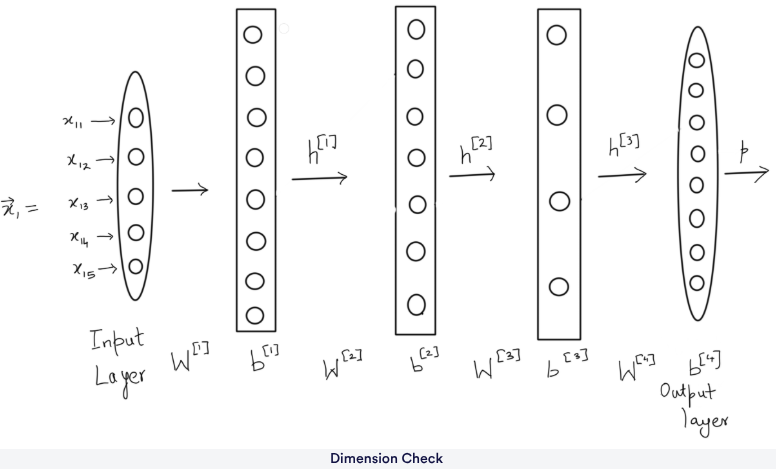

# 📝 Understanding Network Dimensions

In a neural network, the dimensions of the weight matrices are determined by the number of neurons in the current layer and the number of neurons in the preceding layer.

---

### **1. Weight Matrix Dimension Rule**
For any layer $l$, the dimensions of the weight matrix $W^l$ are:
$$\text{Dimensions} = (\text{Number of neurons in layer } l) \times (\text{Number of neurons in layer } l-1)$$

This is because each neuron in the current layer must have a weight connection to every neuron in the previous layer.

---

### **2. Dimension Breakdown for the Example Network**
Based on the provided network architecture, here are the dimensions for each layer:

| Layer | Type | Neurons | Previous Layer Neurons | Weight Matrix Dimensions ($W^l$) |
| :--- | :--- | :--- | :--- | :--- |
| **Layer 0** | Input | 4 | - | - |
| **Layer 1** | Hidden | 2 | 4 | **$2 \times 4$** |
| **Layer 2** | Hidden | 2 | 2 | **$2 \times 2$** |
| **Layer 3** | Output | 1 | 2 | **$1 \times 2$** |


---

### **3. Practice Question: Generalized Network**
Consider the larger network shown in the "Dimension Check" diagram:
* **Input Layer**: 5 neurons ($x_1$ to $x_5$)
* **Layer 1**: 8 neurons
* **Layer 2**: 7 neurons
* **Layer 3**: 6 neurons
* **Output Layer**: 8 neurons

**What would be the dimension of $W^{[2]}$ for this network?**
* **Neurons in Layer 2**: 7
* **Neurons in Layer 1**: 8
* **Answer**: The dimension of $W^{[2]}$ is **$7 \times 8$**.

---

### **💡 Summary of Learnable Parameters**
The total number of learnable parameters in a network includes:
1.  **Weights**: All individual values within the weight matrices ($W$).
2.  **Biases**: One bias value ($b$) for every neuron in the hidden and output layers.

**Next Step:**
Would you like me to calculate the **total number of learnable parameters** (weights + biases) for the pixel-counting network?

# 📝 Identifying Vector Dimensions

### **Question 1**
Based on the provided "Dimension Check" diagram, what is the dimension of the input vector $\vec{x}_1$?

1.  **(5, 1)**
2.  (1, 5)

---

### **✅ Correct Answer**
**(5, 1)**

There are 5 neurons in the input layer. Hence (5,1). By default, a vector is assumed to be a column vector.

# 📝 Identifying Weight Matrix Dimensions

### **Question 2**
Based on the provided "Dimension Check" diagram, what are the dimensions of the weight matrices $W^{[1]}$, $W^{[2]}$, $W^{[3]}$, and $W^{[4]}$?

1.  (5,8), (8,7), (7,4) and (4,8)
2.  **(8,5), (7,8), (4,7) and (8,4)**

---

### **✅ Correct Answer**
**(8,5), (7,8), (4,7) and (8,4)**

To find the dimension of a weight matrix $W^{[l]}$, we use the rule:  
**Dimensions = (Neurons in current layer $l$) $\times$ (Neurons in previous layer $l-1$)**


# 📝 Identifying Output Vector Dimensions

### **Question 3**
Based on the provided "Dimension Check" diagram, what are the dimensions of the output vectors of the hidden layers $h^{[1]}$ and $h^{[2]}$?

1.  **(8, 1) and (7, 1)**
2.  (1, 8) and (1, 7)

---

### **✅ Correct Answer**
**(8, 1) and (7, 1)**

The dimension of the output vector for a layer l is (number of neurons in the layer, 1)




# 📝 Identifying Bias Vector Dimensions

### **Question 4**
The dimension of the bias vector is the same as the output vector for a layer $l$ for a single input vector. True or False?

1.  **True**
2.  False

---

### **✅ Correct Answer**
**True**

For a single data input, both have the same dimension.



### **Example from the "Dimension Check" Diagram**
* **Layer 1**: Has 8 neurons. Output vector $h^{[1]}$ is **(8, 1)**. Bias vector $b^{[1]}$ is **(8, 1)**.
* **Layer 2**: Has 7 neurons. Output vector $h^{[2]}$ is **(7, 1)**. Bias vector $b^{[2]}$ is **(7, 1)**.
* **Layer 3**: Has 4 neurons. Output vector $h^{[3]}$ is **(4, 1)**. Bias vector $b^{[3]}$ is **(4, 1)**.
* **Layer 4**: Has 8 neurons. Output vector $p$ is **(8, 1)**. Bias vector $b^{[4]}$ is **(8, 1)**.

---


# 📝 Quiz: Calculating Total Learnable Parameters

### **Question 5**
What is the number of learnable parameters in this network? Note that the learnable parameters are weights and biases.

1. 156
2. **183**
3. 176

---

### **✅ Correct Answer**
**183**


| Layer | Weight Matrix Size | Weights | Bias Vector Size | Biases | Total |
| :--- | :--- | :--- | :--- | :--- | :--- |
| **Layer 1** | $(8, 5)$ | 40 | $(8, 1)$ | 8 | 48 |
| **Layer 2** | $(7, 8)$ | 56 | $(7, 1)$ | 7 | 63 |
| **Layer 3** | $(4, 7)$ | 28 | $(4, 1)$ | 4 | 32 |
| **Layer 4** | $(8, 4)$ | 32 | $(8, 1)$ | 8 | 40 |
| **Total** | | **156** | | **27** | **183** |